In [6]:
from src.training.training import train_model, train_and_save, load_model
from src.models.get_data import get_tensors
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from src.visualization.pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from src.visualization.brier_score import make_brier_skill_plot, make_brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS
from src.visualization.scoring_tables import make_table
from src.visualization.twcrpss_plot import make_twcrpss_plot, make_twcrps_plot
from src.models.emos import EMOS
from src.visualization.reliability_diagram import make_reliability_diagram, make_reliability_diagram_sklearn, make_reliability_and_sharpness
from src.training.training import load_model
from src.visualization.plot_forecasts import plot_forecast_cdf, plot_forecast_pdf, plot_weight_mixture, plot_forecast_pdf_i

In [35]:
forecast_distribution = 'distr_trunc_normal'
distribution_1 = 'distr_trunc_normal'
distribution_2 = 'distr_log_normal'

loss = 'loss_CRPS_sample' # options: loss_CRPS_sample, loss_twCRPS_sample, loss_log_likelihood

chain_function = 'chain_function_normal_cdf_plus_constant' # options: chain_function_normal_cdf, chain_function_indicator, chain_function_normal_cdf_plus_constant
chain_function_mean = 13
chain_function_std = 2
chain_function_threshold = 15 # 12 / 15
chain_function_constant = 0.05

optimizer = 'Adam'
learning_rate = 0.03
folds = [1,2]
neighbourhood_size = 11
ignore = ['229', '285', '323']
epochs = 800

samples = 100
printing = True
pretrained = True
random_init = False

all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot', 'spatial_variance']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['spatial_variance']

In [36]:
model_spatial = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

model_features = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot', 'spatial_variance']

model_all = train_model(
    forecast_distribution,
    loss,
    optimizer,
    learning_rate,
    folds,
    all_features,
    location_features,
    scale_features,
    neighbourhood_size,
    ignore,
    epochs,

    chain_function = chain_function,
    chain_function_mean = chain_function_mean,
    chain_function_std = chain_function_std,
    chain_function_constant = chain_function_constant,
    chain_function_threshold = chain_function_threshold,
    samples = samples,
    printing = printing,
    distribution_1 = distribution_1,
    distribution_2 = distribution_2,
    pretrained = pretrained,
    random_init = random_init
    )


Using default parameters for truncated normal distribution
Step: 0, Loss: 1.666823148727417
Step: 1, Loss: 1.6000944375991821
Step: 2, Loss: 1.5419868230819702
Step: 3, Loss: 1.4928258657455444
Step: 4, Loss: 1.4532208442687988
Step: 5, Loss: 1.4216681718826294
Step: 6, Loss: 1.3886131048202515
Step: 7, Loss: 1.3575762510299683
Step: 8, Loss: 1.329347014427185
Step: 9, Loss: 1.2957403659820557
Step: 10, Loss: 1.2648999691009521
Step: 11, Loss: 1.2354954481124878
Step: 12, Loss: 1.2067688703536987
Step: 13, Loss: 1.1796668767929077
Step: 14, Loss: 1.1591440439224243
Step: 15, Loss: 1.1337684392929077
Step: 16, Loss: 1.1134511232376099
Step: 17, Loss: 1.0942796468734741
Step: 18, Loss: 1.0778456926345825
Step: 19, Loss: 1.058879017829895
Step: 20, Loss: 1.0396203994750977
Step: 21, Loss: 1.0231164693832397
Step: 22, Loss: 1.0090162754058838
Step: 23, Loss: 0.9945436120033264
Step: 24, Loss: 0.9827871918678284
Step: 25, Loss: 0.9724172949790955
Step: 26, Loss: 0.9643487930297852
Step: 27,

In [37]:
mydict = {
    'model_features': model_features,
    'model_all': model_all
}

In [38]:
print(model_spatial)
print(model_features)
print(model_all)

EMOS Model Information:
Loss function: loss_CRPS_sample (Samples: 100)
Forecast distribution: distr_trunc_normal
Parameters:
  a_tn: [0.39870167]
  b_tn: [ 0.96534383 -0.03995355 -0.14451656  0.03171215  0.02618972]
  c_tn: [1.3575176]
  d_tn: [1.0851038]
Features: wind_speed, press, kinetic, humid, geopot, spatial_variance
Location features: wind_speed, press, kinetic, humid, geopot
Scale features: spatial_variance
Number of features: 6
Neighbourhood size: 11

Optimizer: Adam
Learning rate: 0.029999999329447746

EMOS Model Information:
Loss function: loss_CRPS_sample (Samples: 100)
Forecast distribution: distr_trunc_normal
Parameters:
  a_tn: [0.43923852]
  b_tn: [ 0.9607248  -0.01055509 -0.14659801  0.03498401  0.01173438]
  c_tn: [0.811528]
  d_tn: [ 0.3371959  -0.1165475   0.36363158 -0.06790522 -0.45890483]
Features: wind_speed, press, kinetic, humid, geopot, spatial_variance
Location features: wind_speed, press, kinetic, humid, geopot
Scale features: wind_speed, press, kinetic, h

In [39]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test = get_tensors(model_spatial.neighbourhood_size, model_spatial.all_features, test_fold, ignore)
X_test = model_spatial.normalize_features(X_test)

In [40]:
print("Model spatial CRPS: ", model_spatial.CRPS(X_test, y_test, 20000))
print("Model features CRPS: ", model_features.CRPS(X_test, y_test, 20000))
print("Model all CRPS: ", model_all.CRPS(X_test, y_test, 20000))

Model spatial CRPS:  tf.Tensor(0.89057404, shape=(), dtype=float32)
Model features CRPS:  tf.Tensor(0.8882729, shape=(), dtype=float32)
Model all CRPS:  tf.Tensor(0.8859678, shape=(), dtype=float32)


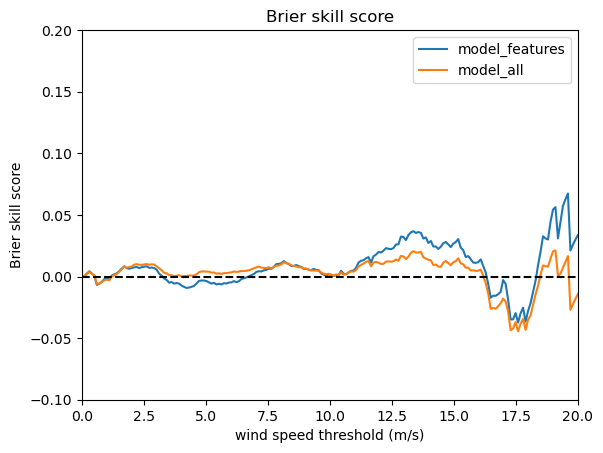

In [41]:
values = np.linspace(0,20,200)
ylim=[-0.1, 0.2]
make_brier_skill_plot(model_spatial, mydict, X_test, y_test, values, ylim)

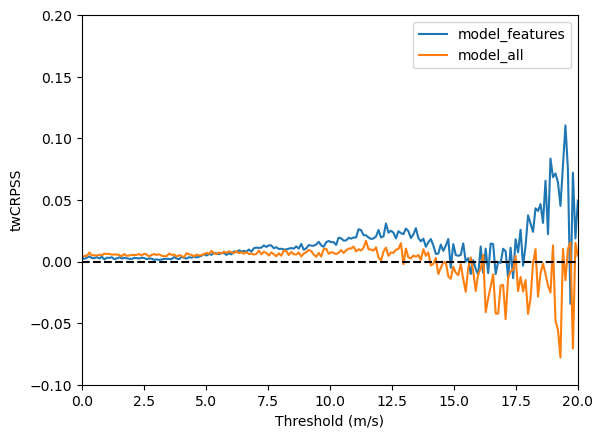

In [43]:
make_twcrpss_plot(model_spatial, mydict, X_test, y_test, values, ylim)

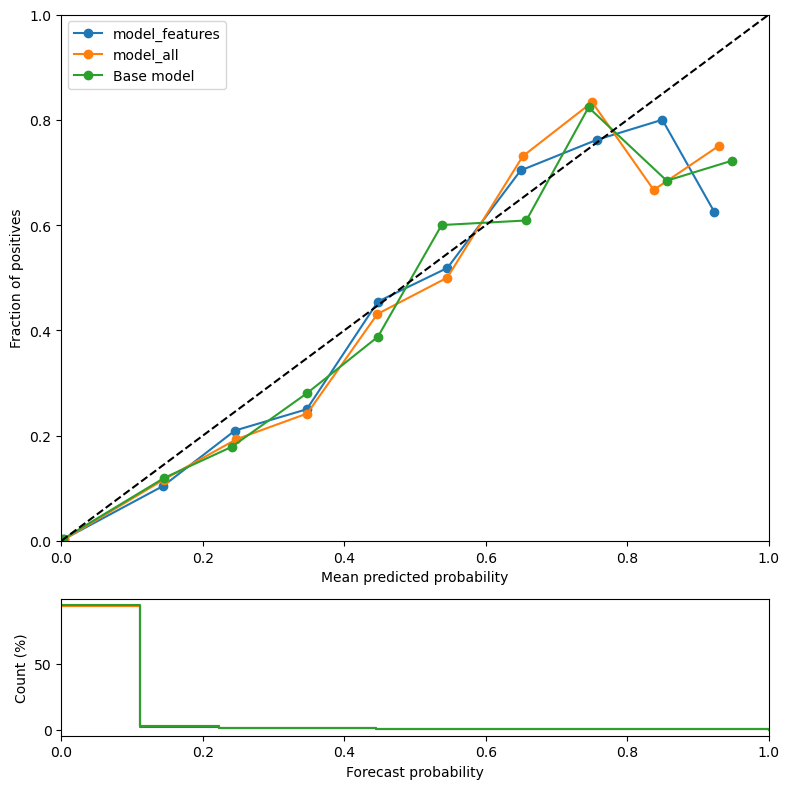

In [42]:
t = 14

make_reliability_and_sharpness(mydict, X_test, y_test, t, base_model=model_spatial)

probabilities contain nan
There are 104 values in the PIT diagram


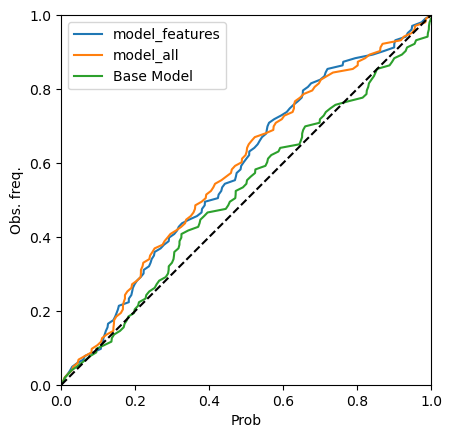

In [34]:
t = 15
make_cpit_diagram_emos(mydict, X_test, y_test, t=t, base_model=model_spatial)